In [1]:
import time 
import os 
import numpy as np 
import matplotlib.pyplot as plt
import json 
import ctypes 
import tifffile 

from scipy import ndimage as nd

import pypore3d 
from pypore3d import *
from pypore3d.p3dFiltPy import *
from pypore3d.p3dBlobPy import *
from pypore3d.p3dSkelPy import *
from pypore3d.p3dSITKPy import *



from glob import glob 
from tqdm import tqdm 

from poreUtils import *

In [2]:
data_dir = 'D:\\sagar\\Data\\MD_1264_A1_1_Z3.3mm\\result\\'

# roi specification 
x, y, z = 300, 300, 300
res = 0.002 # 2 micron 

rois = glob(data_dir + '*.raw')

In [3]:

for roi in tqdm(rois[0:1]):
    result = {}
    # Reading the file 
    volc = py_p3dReadRaw8(roi, x, y, z)
    # Appying Median filter for removing noise
    volc = py_p3dMedianFilter8(volc, x, y, z, width=3)
    # convert it to numpy array for manual thresholding and a bit processing which are easy in numpy array
    vol = swigObjt2uint8Array(volc, x, y, z)
    th_vol = vol < 55 
    th_vol = nd.binary_closing(th_vol, np.ones((2,2,2)))
    # From binary to 0-255
    th_vol = norm8bit(th_vol, 0, 1)
    # Converting back to py_p3d data format to be able to use the functionality 
    th_vol.tofile('th_vol.raw')
    th_volc = py_p3dReadRaw8('th_vol.raw', x, y, z)
    os.remove('th_vol.raw')
    
    # Basic Analysis
    basic_stats = py_p3dBasicAnalysis(th_volc, x, y, z, resolution=res)
    basic_anaysis = formatBasicStats(basic_stats, definition=True)
    result['basic_analysis'] = basic_anaysis
    
    # Anisotropy Analysis
    anisotropy_stats = py_p3dAnisotropyAnalysis(th_volc, x, y, z, resolution=res)
    anisotropy_analysis = formatAnisotropyStats(anisotropy_stats, definition=True)
    result['anisotropy_analysis'] = anisotropy_analysis
    
    # Blob Analysis 
    blob_stats, _, _ = py_p3dBlobAnalysis(th_volc, x, y, z, resolution=res)
    blob_analysis = formatBlobStats(blob_stats, definition=True)
    result['blob_analysis'] = blob_analysis
    
    jsonString = json.dumps(result)
    jsonFile = open(roi.split('_8bit')[0] + '.json', "w")
    jsonFile.write(jsonString)
    jsonFile.close()
    
    

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.53s/it]


In [4]:
for roi in tqdm(rois[0:1]):
    result = {}
    # Reading the file 
    volc = py_p3dReadRaw8(roi, x, y, z)
    # Appying Median filter for removing noise
    volc = py_p3dMedianFilter8(volc, x, y, z, width=3)
    # convert it to numpy array for manual thresholding and a bit processing which are easy in numpy array
    vol = swigObjt2uint8Array(volc, x, y, z)
    th_vol = vol < 64 

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.16s/it]


In [7]:
th_vol = norm8bit(th_vol, 0, 1)

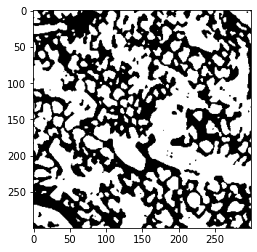

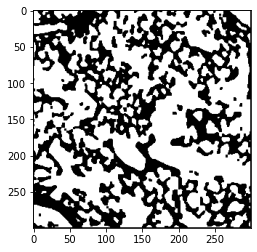

In [45]:
vol = swigObjt2uint8Array(volc, x, y, z)
th_vol = vol < 55
plt.imshow(th_vol[10, ...], cmap='gray')
plt.show()
th_vol = nd.binary_closing(th_vol, np.ones((3,3,3)))
plt.imshow(th_vol[10, ...], cmap='gray')
plt.show()

In [14]:
th_vol.max()

True

In [15]:
roi

'D:\\sagar\\Data\\MD_1264_A1_1_Z3.3mm\\result\\0-300x1200-1500x2000-2300_8bit.raw'